In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns

#nltk.download('punkt')
#nltk.download('stopwords')

# Load and process attestation data

In [2]:
df = pd.read_csv("data/2023-10-07_indexed_attestations.csv")
df.rename(columns={'urlType': 'Website'}, inplace=True)
df.tail(2).T

,1737,1738
id,0xcba0c3ad859a1c164a9a300b587abe5544cdc98e97f6...,0xcba0c3ad859a1c164a9a300b587abe5544cdc98e97f6...
attester,0x78726673245fdb56425c8bd782f6FaA3E447625A,0x78726673245fdb56425c8bd782f6FaA3E447625A
timeCreated,1696691270,1696691270
name,JustCause,JustCause
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,Crowdfunding application that uses an innovati...,Crowdfunding application that uses an innovati...
impactCategory(ies),END_USER_EXPERIENCE_AND_ADOPTION,END_USER_EXPERIENCE_AND_ADOPTION
attestationType,contributionLink,impactMetric
attestationUrl,https://github.com/smeee23/justcause_contracts,https://justcause.finance


In [3]:
CATEGORIES = ['OP_STACK', 'DEVELOPER_ECOSYSTEM', 'END_USER_EXPERIENCE_AND_ADOPTION', 'COLLECTIVE_GOVERNANCE']
LABELS = ['OP Stack', 'Developer Ecosystem', 'End User Experience', 'Collective Governance']

def explode_categories(row):
    categories = row['impactCategory(ies)'].split(', ')
    for cat in CATEGORIES:
        row[cat] = cat in categories
    return row

df = df.apply(explode_categories, axis=1)
df.rename(columns=dict(zip(CATEGORIES,LABELS)), inplace=True)
df.tail(2).T

,1737,1738
id,0xcba0c3ad859a1c164a9a300b587abe5544cdc98e97f6...,0xcba0c3ad859a1c164a9a300b587abe5544cdc98e97f6...
attester,0x78726673245fdb56425c8bd782f6FaA3E447625A,0x78726673245fdb56425c8bd782f6FaA3E447625A
timeCreated,1696691270,1696691270
name,JustCause,JustCause
applicationMetadataPtr,https://content.optimism.io/rpgf3Application/v...,https://content.optimism.io/rpgf3Application/v...
applicantType,PROJECT,PROJECT
bio or description,Crowdfunding application that uses an innovati...,Crowdfunding application that uses an innovati...
impactCategory(ies),END_USER_EXPERIENCE_AND_ADOPTION,END_USER_EXPERIENCE_AND_ADOPTION
attestationType,contributionLink,impactMetric
attestationUrl,https://github.com/smeee23/justcause_contracts,https://justcause.finance


# Analysis modules

In [4]:
def source_heatmap(attestation_type):
    
    filtered_data = df[df['attestationType'] == attestation_type]
    heatmap_data = filtered_data.groupby('Website')[LABELS].sum()
    significant_websites = filtered_data.groupby('Website')['attester'].nunique()
    indices = significant_websites[significant_websites>1].sort_values(ascending=False).index
    heatmap_data = heatmap_data.map(lambda x: None if x == 0 else x)
    heatmap_data = heatmap_data.loc[indices,]

    fig, ax = plt.subplots(figsize=(10,8), dpi=300)
    sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".0f", cbar=False, linewidths=1)
    ax.xaxis.set_ticks_position('top')
    ax.set_title(f"Number of {attestation_type} attested to by source (external website)\n")
    ax.tick_params(axis='x', labelrotation=0)

    plt.show()

In [5]:
STOPWORDS = nltk.corpus.stopwords.words('english') 
STOPWORDS.extend(['github', 'number', 'using', 'repo', 'idea', 'repository', 'twitter', 'x',
                  'optimism', 'open', 'source', 'projects','op', 'size', 'total'])

WEBSITES = ['github', 'etherscan', 'dune', 'twitter', 'optimism', 'google']

def get_most_common_metrics(attestation_type):
    
    for website in WEBSITES:
        print(f"Most common keywords for {website.upper()}...")
        filtered_data = df[(df['attestationType'] == attestation_type) & (df['Website'] == website)]        
        text = " ".join(filtered_data['attestationDescription'].dropna())
        tokens = [word.lower() for word in nltk.word_tokenize(text) if word.isalpha()]
        filtered_tokens = [word for word in tokens if word not in STOPWORDS]
        word_freq = Counter(filtered_tokens)
        common_keywords = word_freq.most_common(20)
        common_keywords = [(x, count) for x, count in common_keywords if count >= 2]
        for (word, count) in common_keywords:
            print(word, count)
        print()

# Results

## Impact Metrics

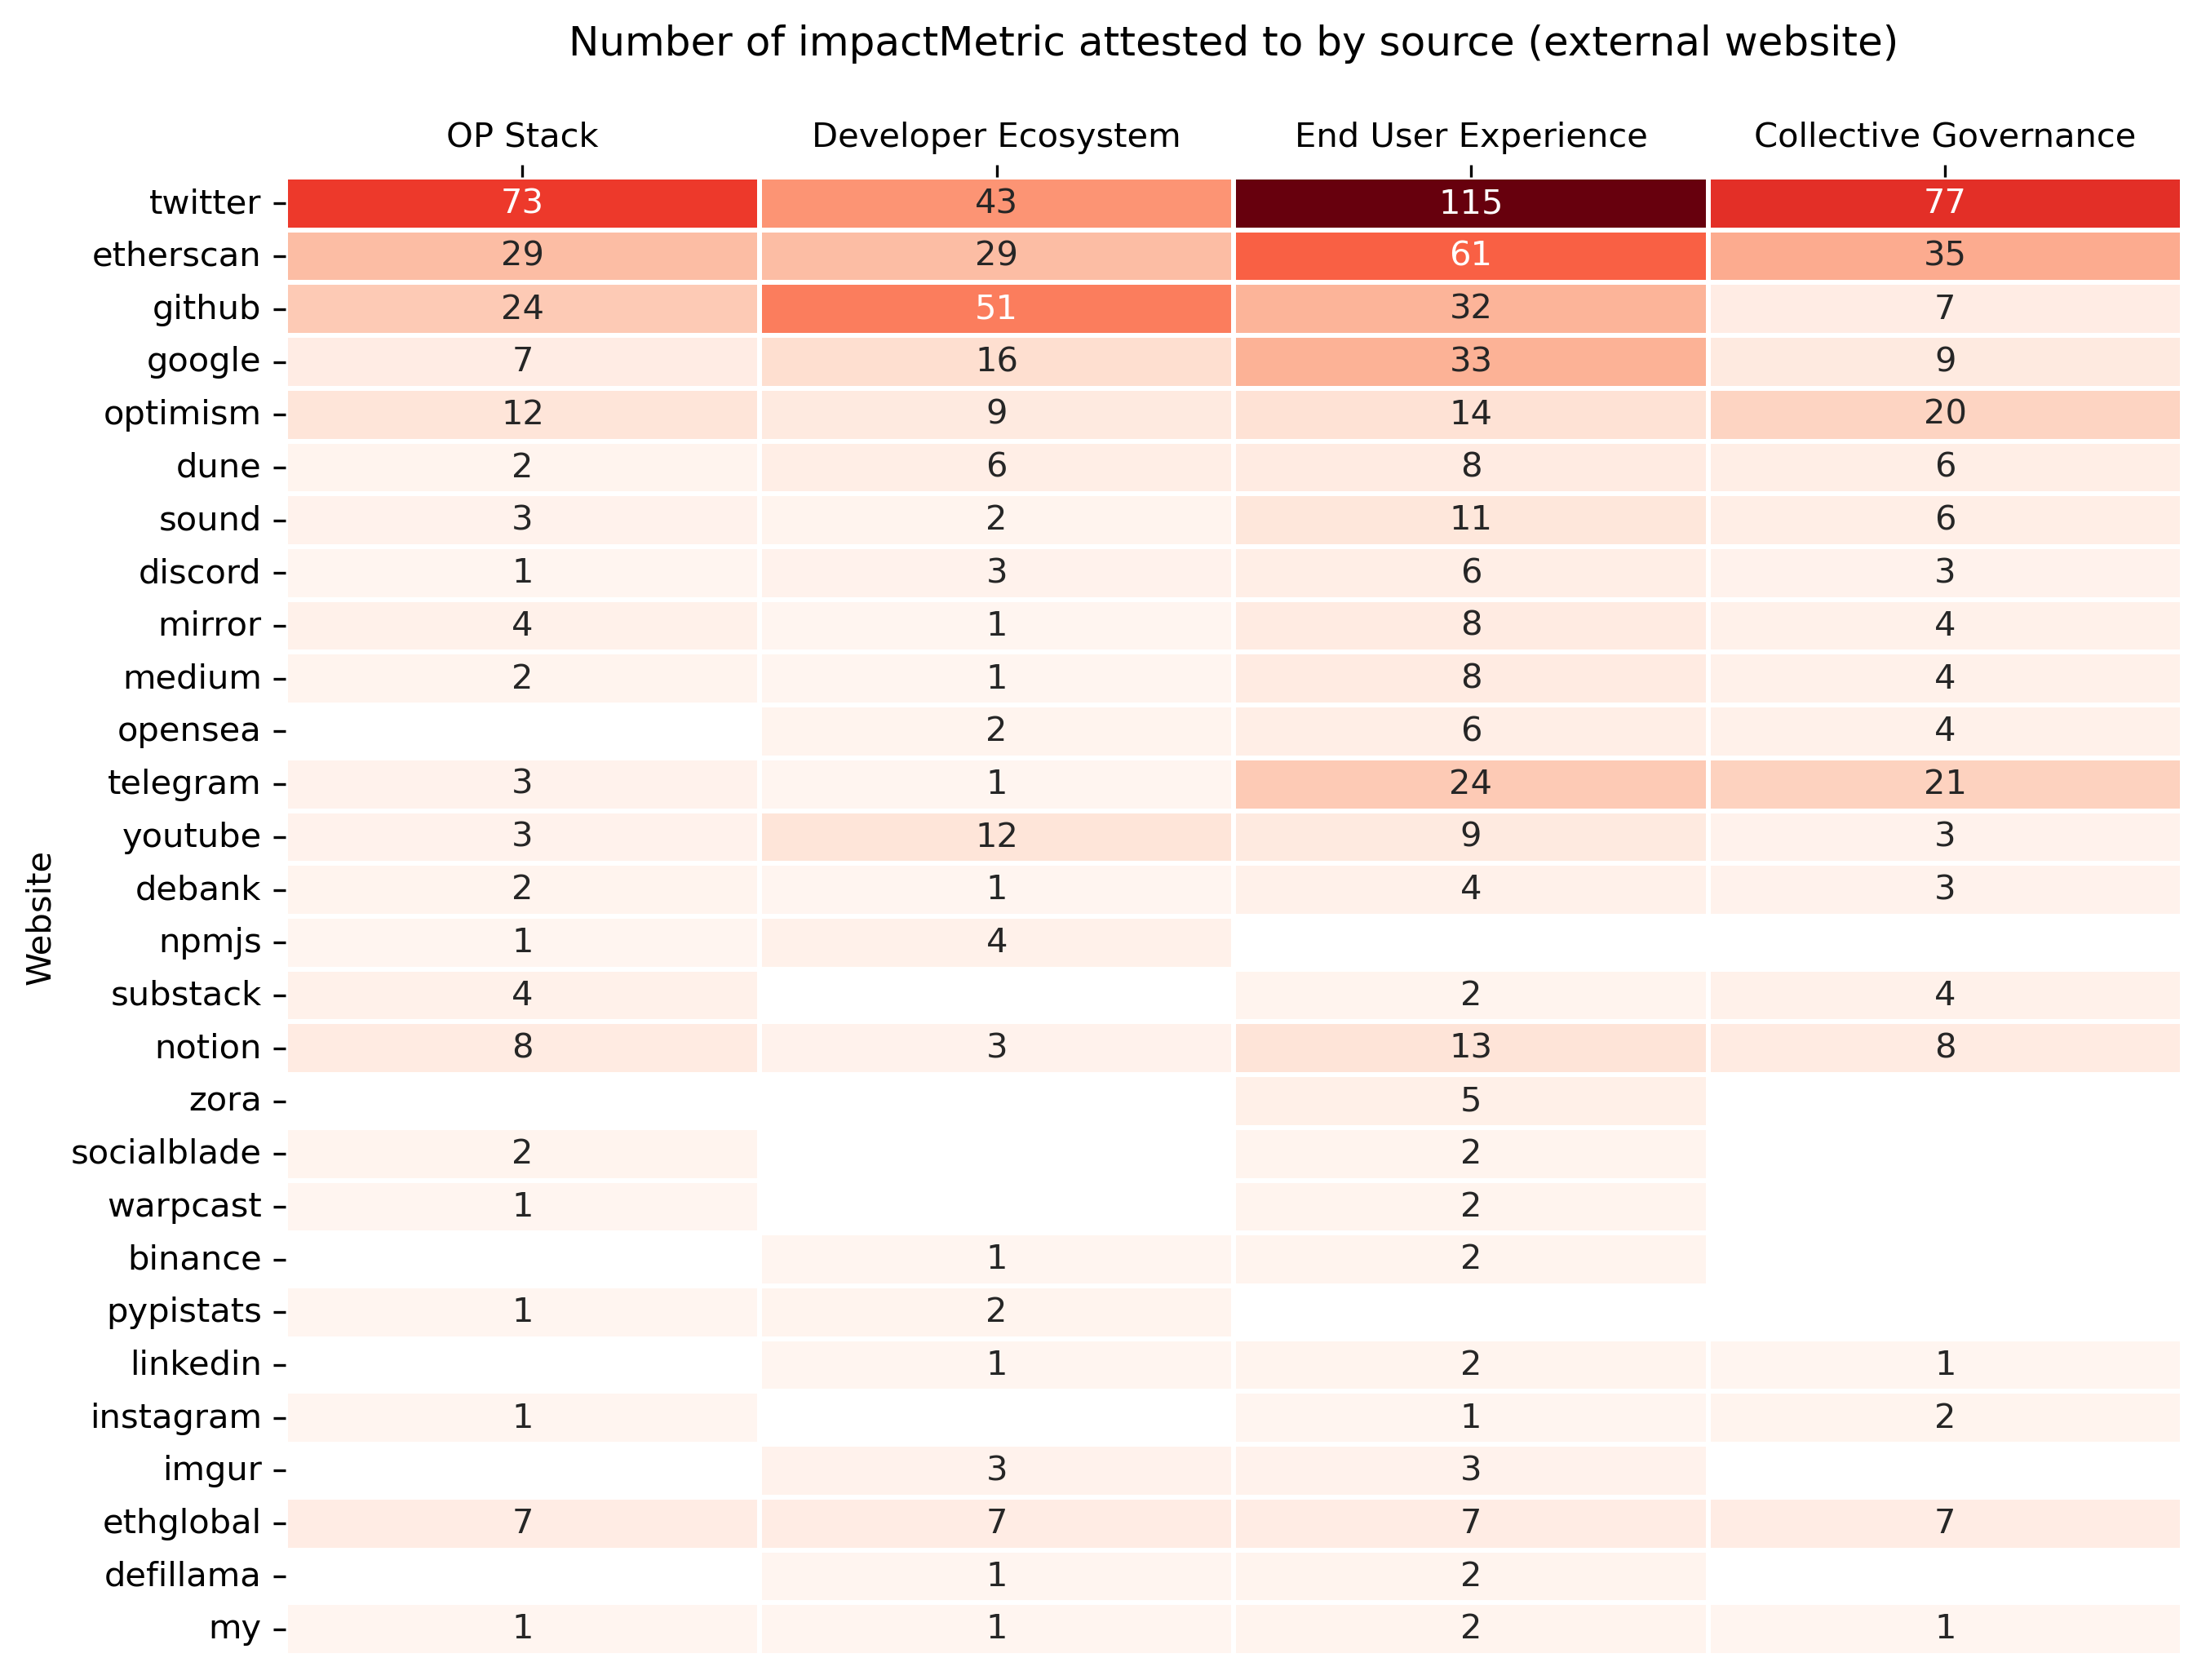

In [6]:
source_heatmap('impactMetric')

In [7]:
get_most_common_metrics('impactMetric')

Most common keywords for GITHUB...
stars 22
forks 6
contributors 4
star 2
downloads 2
community 2
prs 2
dune 2
library 2

Most common keywords for ETHERSCAN...
transactions 8
transaction 3
mint 3
users 3
address 3
scan 2
etherscan 2
wallet 2
nft 2
goerli 2

Most common keywords for DUNE...
collective 3
snapshot 3
unique 2
value 2
stars 2

Most common keywords for TWITTER...
views 25
engagement 15
followers 8
impressions 8
tweet 6
weekly 5
layer 5
roundup 5
thread 4
unique 4
residents 4
houses 4
analysis 3
article 3
airdrop 3
stack 3
hacked 2
supported 2
events 2
hosted 2

Most common keywords for OPTIMISM...
analysis 2
forum 2
views 2
impact 2
nother 2
impactw 2
application 2
processed 2
cycle 2

Most common keywords for GOOGLE...
views 4
top 4
dapps 4
day 4
users 3
downloads 3
impression 2
wallets 2
daily 2
growth 2
unique 2
page 2
audio 2
impressions 2
subscribers 2
followers 2
content 2
sheet 2
evaluation 2
feedback 2



## Contributions

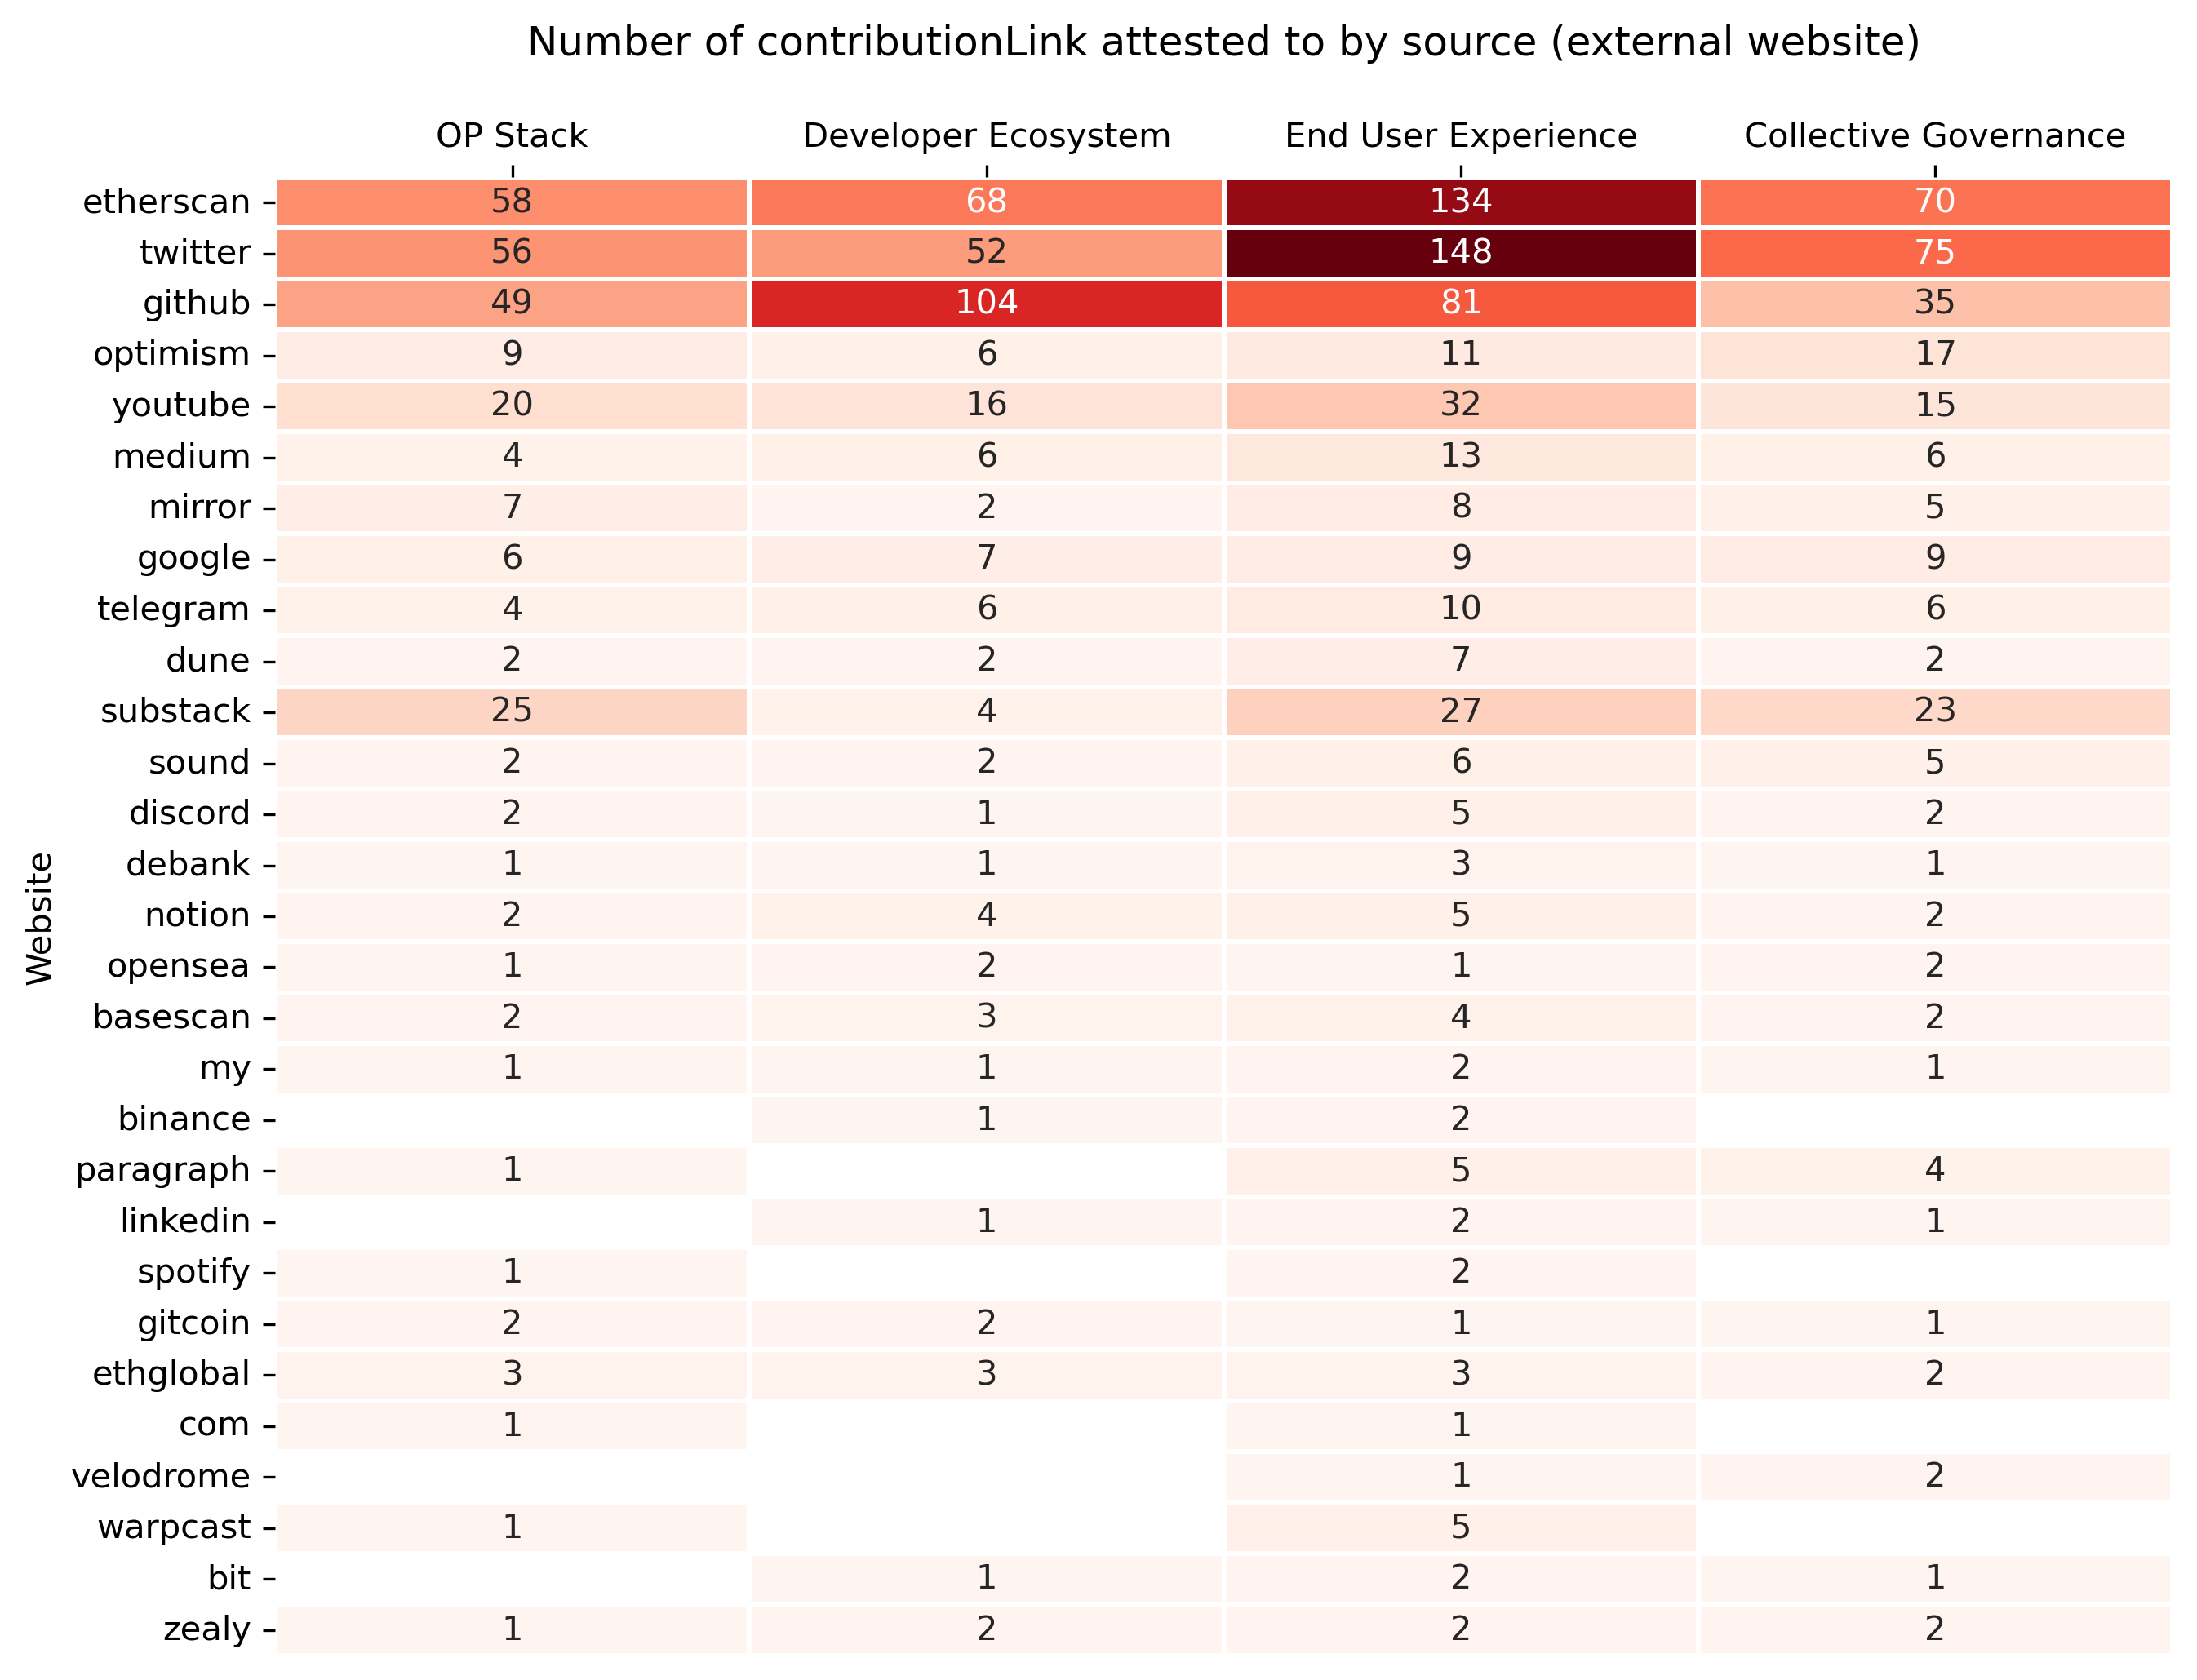

In [8]:
source_heatmap('contributionLink')

In [9]:
get_most_common_metrics('contributionLink')

Most common keywords for GITHUB...
code 8
evm 6
project 6
dune 6
contributions 5
analytics 5
protocol 5
reth 5
client 5
solidity 5
rust 4
library 4
main 4
contract 4
work 4
voting 4
api 4
ux 4
contracts 4
monorepo 3

Most common keywords for ETHERSCAN...
contract 30
nft 16
pool 9
transaction 8
wallet 8
governance 6
address 6
urban 6
transactions 5
network 5
token 5
contracts 5
project 5
pooltogether 5
supply 5
testnet 4
gaming 4
funding 4
dao 4
used 4

Most common keywords for DUNE...
dashboard 4
dune 3

Most common keywords for TWITTER...
thread 26
ink 9
tank 9
bedrock 7
rollups 7
tweet 7
post 6
stack 6
https 4
governance 4
superchain 4
analysis 3
airdrop 3
mainnet 3
introducing 3
new 3
account 3
keep 3
blockchain 3
good 3

Most common keywords for OPTIMISM...
delegate 3
incentive 2
impact 2
analysis 2
token 2
house 2
dwoijjajknldwakn 2
awdk 2
daw 2
delegation 2
statement 2

Most common keywords for GOOGLE...
week 3
google 3
sf 2
blockchain 2
devcon 2
training 2
report 2



# BACKUP

In [10]:
def plot_category(impact_category):

    fig, ax = plt.subplots(figsize=(10,5))

    dff = df[df['impactCategory(ies)'].str.contains(impact_category)]
    num_projects = dff['attester'].nunique()

    (dff
     .query("attestationType == 'impactMetric'")
     .groupby('Website')['attester']
     .nunique()
     .sort_values()
     .tail(20)
     / num_projects
    ).plot(kind='barh', color="#FF0420")

    ax.set_title(f"{impact_category} ({num_projects} projects)")

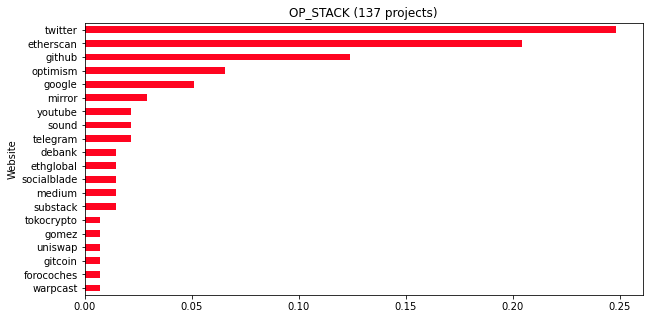

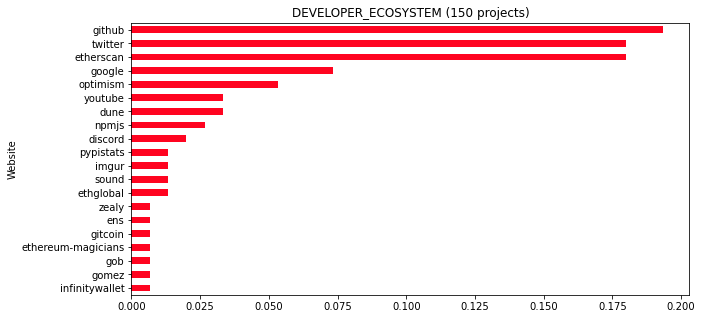

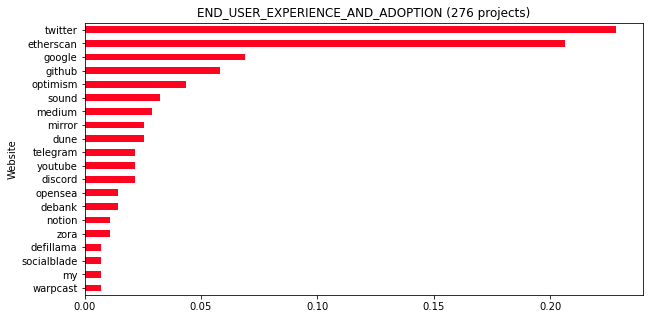

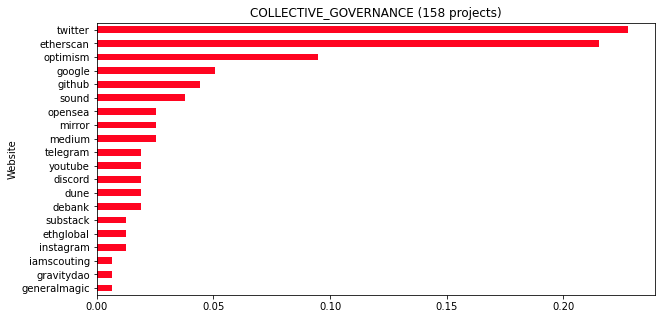

In [11]:
for c in CATEGORIES:
    plot_category(c)